##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], weightsinit=2, lastReLU=False, debug_bw=True
)  # 2-layer neural network
xinumbers = list(range(4, 4+nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
print("parameters")
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

Module nn MLP: structure
[1, 2, 1]
2
inputs=  4
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=N1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
loss=10
activation = model(xinput)

def act():
    #### forward pass0
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)

def zeroParams():
    for p in model.parameters():
        p.grad = 0.0

def back():
    #### backward pass
    # loss.backward()
    activation.backward()

def upd():
    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())


# Optimization Step
def opt_step():
    #### forward pass0
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)

    #### backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    draw_dot(loss, debug_print_01=False)

    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

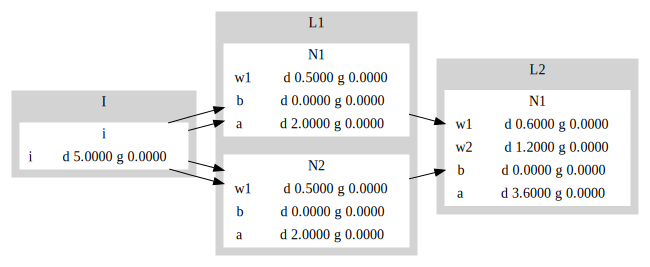

In [5]:
activation = model(xinput)
dot=draw_nn(xinput, model)
dot

backward add   v024   0.00 ->   1.00 v025   0.00 ->   1.00
backward add   v007   0.00 ->   1.00 v023   0.00 ->   1.00
backward mul   v005   0.00 ->   2.00 v020   0.00 ->   0.60
backward add   v002   0.00 ->   0.60 v019   0.00 ->   0.60
backward mul   v001   0.00 ->   2.40 v008   0.00 ->   0.30
backward mul   v006   0.00 ->   2.00 v022   0.00 ->   1.20
backward add   v004   0.00 ->   1.20 v021   0.00 ->   1.20
backward mul   v003   0.00 ->   4.80 v008   0.30 ->   0.90


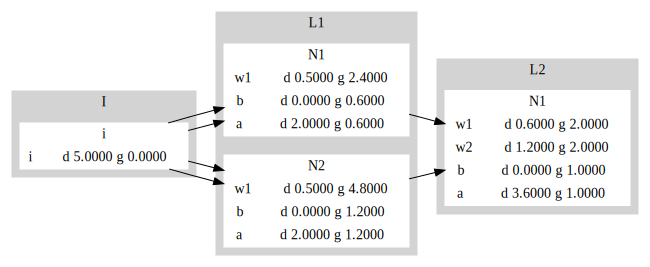

In [6]:
back()
dot=draw_nn(xinput, model)
dot

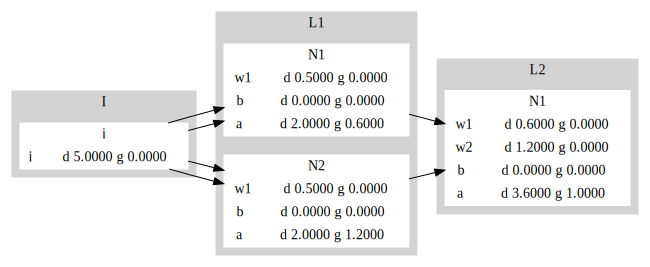

In [7]:
zeroParams()
dot=draw_nn(xinput, model)
dot

parameters
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=0.0),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0.0),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=0.0),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=0.0),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,data=0.6000000000000001, grad=0.0),
    Value(name=v006,layernumber=L2,neuronnumber=N1,weightnumber=,type=w2,data=1.2000000000000002, grad=0.0),
    Value(name=v007,layernumber=L2,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0.0)]
backward add   v024   1.00 ->   2.00 v025   1.00 ->   2.00
backward add   v007   0.00 ->   2.00 v023   1.00 ->   3.00
backward mul   v005   0.00 ->   6.00 v020   0.60 ->   2.40
backward add   v002   0.00 ->   2.40 v019   0.60 ->   3.00
backward mul   v001   0.00 ->  12.00 v008   0.90 ->   2.40
backward mul   

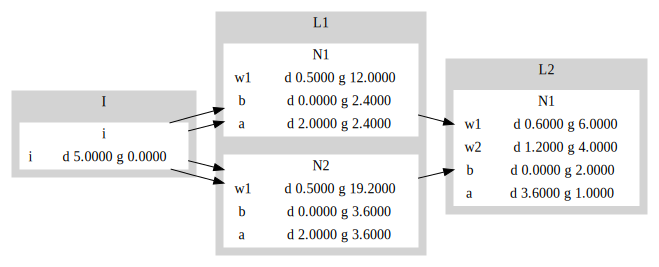

In [8]:

print("parameters")
pp.pprint(model.parameters())
back()
print("parameters")
pp.pprint(model.parameters())
dot=draw_nn(xinput, model)
dot

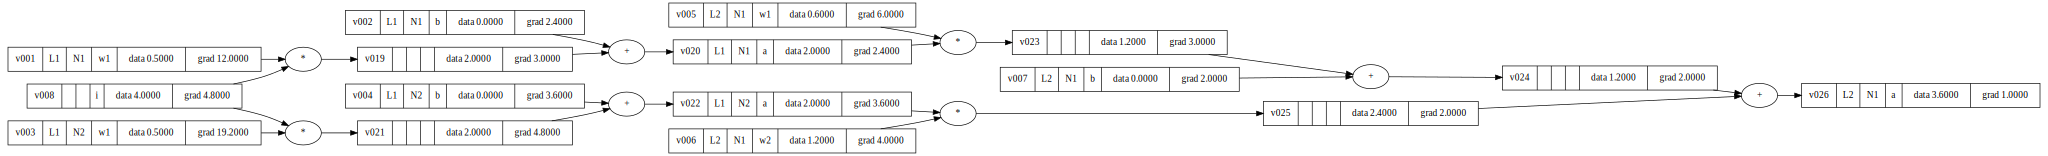

In [9]:
dot2=draw_dot(activation)
dot2